# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_______________________________________________________

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [0]:
myinputs = keras.Input(shape=(784,))
#l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(myinputs)
#l2 = layers.Flatten()(l1)
encode1 = layers.Dense(784, activation='tanh')(myinputs)
encode2 = layers.Dense(64, activation="tanh")(encode1)
latent = layers.Dense(10, activation="tanh")(encode2)
decode1 = layers.Dense(64, activation="tanh")(latent)
decode2 = layers.Dense(784, activation="sigmoid")(decode1)
#reshape = layers.Reshape([28,28])(decode2)
#myoutputs = layers.experimental.preprocessing.Rescaling(255)(reshape)
mymodel = keras.Model(myinputs, decode2)
mymodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_7 (Dense)              (None, 784)               50960     
Total params: 717,994
Trainable params: 717,994
Non-trainable params: 0
_____________________________________________________

In [0]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
mymodel.compile(optimizer=optimizer, loss="binary_crossentropy")

In [0]:
batch_size = 32

In [0]:
x_train = x_train /255
x_test = x_test /255

x_train = x_train.reshape(len(x_train), 784)
x_test = x_test.reshape(len(x_test), 784)

In [0]:
x_train.shape

(60000, 784)

In [0]:
autoencoder = mymodel.fit(x_train, x_train,
                epochs=15,
                batch_size=batch_size,
                #shuffle=False,
                validation_data=(x_test, x_test))

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2391 - val_loss: 0.2264
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2254 - val_loss: 0.2188
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2205 - val_loss: 0.2172
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2180 - val_loss: 0.2137
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2159 - val_loss: 0.2140
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2146 - val_loss: 0.2131
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2145 - val_loss: 0.2127
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2138 - val_loss: 0.2149
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2137 - val_loss: 0.2190
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.213

In [0]:
print(autoencoder.history)

{'loss': [0.23908936977386475, 0.22536438703536987, 0.220460444688797, 0.21799397468566895, 0.2158808708190918, 0.21458907425403595, 0.21447058022022247, 0.21382252871990204, 0.21368493139743805, 0.21339935064315796, 0.21495510637760162, 0.21328580379486084, 0.21513047814369202, 0.21307314932346344, 0.21461261808872223], 'val_loss': [0.22639934718608856, 0.21878407895565033, 0.21720010042190552, 0.21369720995426178, 0.21399962902069092, 0.21313980221748352, 0.21268108487129211, 0.21491076052188873, 0.21897533535957336, 0.21212293207645416, 0.21671564877033234, 0.2145376205444336, 0.21301127970218658, 0.21301418542861938, 0.2129913866519928]}


In [0]:
print(x_test.shape)

(10000, 784)


In [0]:
predictions = mymodel.predict(x_test, batch_size=batch_size)
print(predictions.shape)

(10000, 784)


In [0]:
import matplotlib.pyplot as plt

In [0]:
sampleNumber = 30

In [0]:
input_image = x_train[sampleNumber:sampleNumber+1,:].reshape(28,28)

In [0]:
output_image = predictions[sampleNumber:sampleNumber+1,:].reshape(28,28)

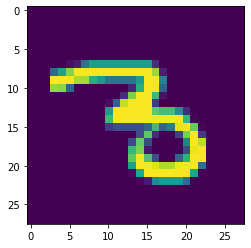

In [0]:
plt.imshow(input_image)

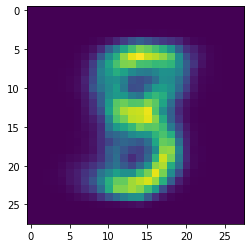

In [0]:
plt.imshow(output_image)

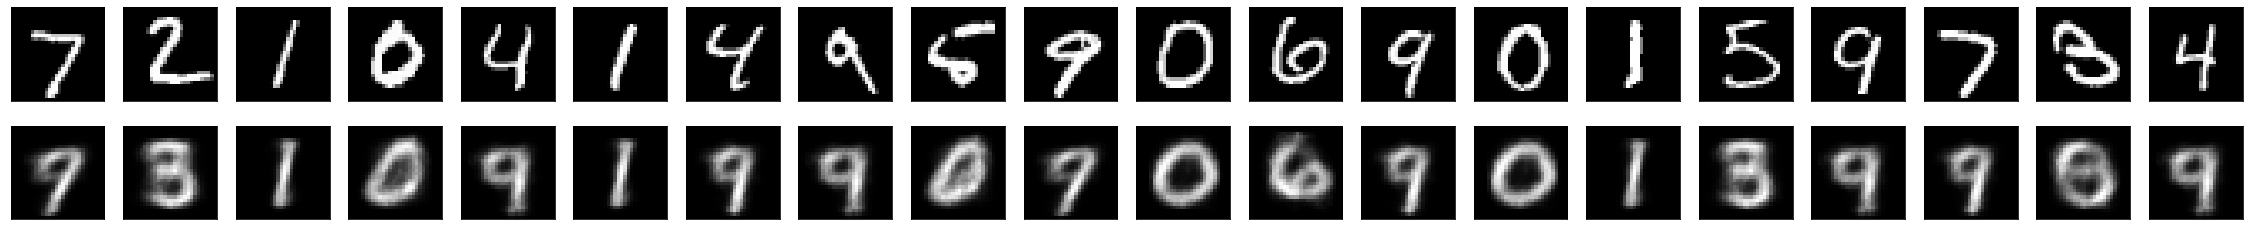

In [0]:
n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
def reconstruction_error(original, reconstructed):
  rec_error = np.absolute(original - reconstructed).sum()
  return rec_error

In [0]:
reconstruction_error(x_test[2], predictions[2])

33.69287625534359

In [0]:
#encoder = keras.Model(myinputs, latent)
#encoded_imgs = encoder.predict(x_test)

#encoded_input = keras.Input(shape=(10,))

#decoder_layer = mymodel.layers[-4]

#decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
#decoded_imgs = decoder.predict(encoded_imgs)

#decoderInput = mymodel.layers[-4]
#decodeLayer1 = layers.Dense(32, activation="tanh")(decoderInput)
#decodeOutputs = layers.Dense(784, activation="tanh")(decodeLayer1)
#decodeReshape = layers.Reshape([28,28])(decodeLayer2)
#decodeOutputs = layers.experimental.preprocessing.Rescaling(255)(decodeReshape)
#mymodel = keras.Model(encoded_input, decodeOutputs)

In [0]:
#decoderInput = mymodel.layers[-4]
#decodeLayer1 = layers.Dense(32, activation="tanh")(decoderInput)
#decodeOutputs = layers.Dense(784, activation="tanh")(decodeLayer1)
#mymodel = keras.Model(encoded_input, decodeOutputs)

#encoded_imgs = encoder.predict(x_test)
#decoded_imgs = decoder.predict(encoded_imgs)

#n = 10  # how many digits we will display
#plt.figure(figsize=(20, 4))
#for i in range(n):
    # display original
#    ax = plt.subplot(2, n, i + 1)
#    plt.imshow(x_test[i].reshape(28, 28))
#    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)

    # display reconstruction
#    ax = plt.subplot(2, n, i + 1 + n)
#    plt.imshow(decoded_imgs[i].reshape(28, 28))
#    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)
#plt.show()

In [0]:
rec_error = np.absolute(x_test, predictions).sum(axis=1)

(array([  1.,   5.,   8.,  14.,  17.,  27.,  34.,  51.,  77.,  61.,  64.,
         74., 112.,  98.,  99., 140., 120., 145., 152., 196., 225., 190.,
        218., 234., 256., 253., 246., 256., 280., 261., 266., 278., 283.,
        295., 303., 284., 270., 250., 284., 244., 252., 205., 206., 182.,
        181., 179., 166., 144., 177., 171., 117., 129., 123., 107., 103.,
        100.,  71.,  78.,  55.,  57.,  56.,  42.,  34.,  40.,  41.,  41.,
         23.,  17.,  20.,  19.,  19.,  17.,  18.,  16.,  17.,  13.,   9.,
          5.,  10.,  11.,   8.,   7.,   4.,   5.,   3.,   5.,   4.,   6.,
          2.,   5.,   2.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,
          2.]),
 array([ 22.039215,  24.384039,  26.728863,  29.073687,  31.41851 ,
         33.763332,  36.10816 ,  38.45298 ,  40.797806,  43.142628,
         45.48745 ,  47.832275,  50.177097,  52.521923,  54.866745,
         57.21157 ,  59.556393,  61.901215,  64.24604 ,  66.590866,
         68.935684,  71.28051 ,  73.625336,  7

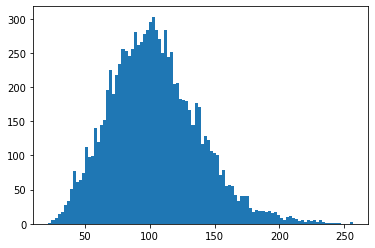

In [0]:
plt.hist(rec_error, bins=100)

In [0]:
test_outliers = x_test[rec_error>200]
prediction_outliers = predictions[rec_error>200]

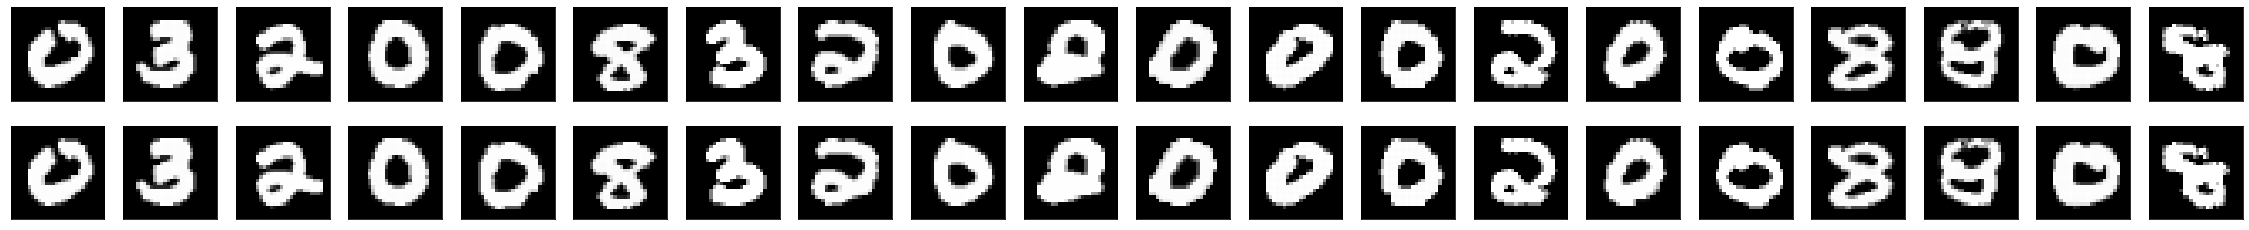

In [0]:
n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_outliers[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(prediction_outliers[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()